# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [234]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 8 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

# What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

## Dataset

In [235]:
data = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [236]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


`Keep calm and code on!`

## Explore Data

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12016
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12017 non-null  float64
 1   1       12017 non-null  float64
 2   2       12017 non-null  float64
 3   3       12017 non-null  float64
 4   4       12017 non-null  float64
 5   5       12017 non-null  float64
 6   6       12017 non-null  float64
 7   7       12017 non-null  float64
 8   8       12017 non-null  float64
 9   9       12017 non-null  float64
 10  10      12017 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.1+ MB


In [238]:
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


In [239]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

# Challenge - train your models, make the best prediction

### Label encoder 
Encode target labels with value between 0 and n_classes-1.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [240]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["numeric"] = le.fit_transform(data["10"])

In [241]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6


In [242]:
columnas = [a for a in data.columns if a not in ["10","numeric"]]
X = data[columnas]
y = data["numeric"]

### Train_Test Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [245]:
X_train.shape

(9613, 10)

In [246]:
y_train.shape

(9613,)

In [247]:
X_test.shape

(2404, 10)

In [248]:
y_test.shape

(2404,)

### Train One Model

Classifier implementing the k-nearest neighbors vote. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [249]:
from sklearn.neighbors import KNeighborsRegressor

In [250]:
neigh = KNeighborsRegressor(n_neighbors=2)

In [251]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [252]:
y_pred = neigh.predict(X_test)

In [253]:
y_pred

array([1., 3., 3., ..., 3., 1., 3.])

In [254]:
prueba = X[0:1]

In [255]:
prueba.head()

,0,1,2,3,4,5,6,7,8,9
0,0.241386,0.109171,-0.127126,0.380626,0.17234,0.314889,0.484429,0.316412,0.18881,0.134922


In [256]:
pred = neigh.predict(prueba)
pred

array([1.5])

In [257]:
from sklearn import metrics
import numpy as np

In [258]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test, y_pred))

MAE:  0.7645590682196339
MSE:  2.0644758735440933
RMSE:  1.4368284078288867
R2:  0.4948625959004327


In [259]:
data["predicción"] = neigh.predict(data[columnas])

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12016
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           12017 non-null  float64
 1   1           12017 non-null  float64
 2   2           12017 non-null  float64
 3   3           12017 non-null  float64
 4   4           12017 non-null  float64
 5   5           12017 non-null  float64
 6   6           12017 non-null  float64
 7   7           12017 non-null  float64
 8   8           12017 non-null  float64
 9   9           12017 non-null  float64
 10  10          12017 non-null  object 
 11  numeric     12017 non-null  int32  
 12  predicción  12017 non-null  float64
dtypes: float64(11), int32(1), object(1)
memory usage: 1.2+ MB


In [261]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric,predicción
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3,1.5
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0,0.0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6,6.0
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6,6.0
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6,6.0


In [262]:
print(data.groupby(["10"])[['numeric']].count())

               numeric
10                    
Clarius           2362
Coronavirucus     1009
Esequlius          427
Marcus            5107
Mongucus           640
Paithonius         600
Philippus         1360
Ubuntius           512


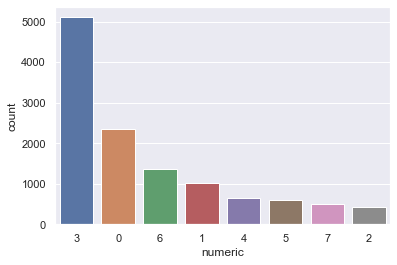

In [263]:
sns.set(style='darkgrid')

sns.countplot(x = 'numeric',
              data = data,
              order = data['numeric'].value_counts().index)
plt.show()

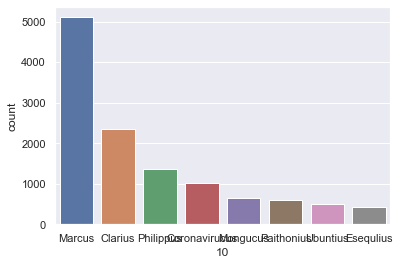

In [264]:
sns.set(style='darkgrid')

sns.countplot(x = '10',
              data = data,
              order = data['10'].value_counts().index)
plt.show()

In [265]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric,predicción
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3,1.5
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0,0.0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6,6.0
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6,6.0
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6,6.0


### Exploring metrics for multi-class classification algorithms
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Accuracy
- Precission
- Recall
- F1_score

In [225]:
#cojo todas menos quality
data= data.drop("10", axis=1, inplace=False)

In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [267]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric,predicción
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3,1.5
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0,0.0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6,6.0
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6,6.0
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6,6.0


### Training several models and explores the metrics for each of them

- DecisionTreeClassifier
- SVC
- RandomForestClassifier
- AdaBoostClassifier
- DecisionTreeClassifier

In [268]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import tree

In [269]:
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "decision TreeClassifier": DecisionTreeClassifier(),
          "AdaBootsClassifier": AdaBoostClassifier()
}

In [270]:
for name, model in models.items():
    print(f"Estoy entrenando el modelo ---> {name}")
    model.fit(X_train, y_train)
    print("He acabado")

Estoy entrenando el modelo ---> ridge
He acabado
Estoy entrenando el modelo ---> lasso
He acabado
Estoy entrenando el modelo ---> sgd
He acabado
Estoy entrenando el modelo ---> knn
He acabado
Estoy entrenando el modelo ---> gradient
He acabado
Estoy entrenando el modelo ---> decision TreeClassifier
He acabado
Estoy entrenando el modelo ---> AdaBootsClassifier
He acabado


In [271]:
#Podemos seguir el mismo proceso para realizar predicciones de cada algoritmo y sacar métricas
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ", metrics.r2_score(y_test, y_pred))

--------ridge--------
MAE:  1.4522830005370497
MSE:  3.7315877964112456
RMSE:  1.9317318127553953
R2:  0.0869524818360431
--------lasso--------
MAE:  1.5081638183041444
MSE:  4.089331934949017
RMSE:  2.0222096664166695
R2:  -0.0005806047883021304
--------sgd--------
MAE:  357.0690215467004
MSE:  546135.5076347817
RMSE:  739.0098156552332
R2:  -133627.81889224506
--------knn--------
MAE:  0.8594841930116471
MSE:  1.8747587354409319
RMSE:  1.369218293567878
R2:  0.5412827182582265
--------gradient--------
MAE:  0.9872365389860536
MSE:  1.680424550217694
RMSE:  1.296311903138166
R2:  0.5888325429422756
--------decision TreeClassifier--------
MAE:  0.06738768718801996
MSE:  0.2021630615640599
RMSE:  0.44962546809990633
R2:  0.9505346003642172
--------AdaBootsClassifier--------
MAE:  1.2920133111480865
MSE:  3.7728785357737107
RMSE:  1.9423899031280283
R2:  0.07684943478076256


![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)